# Week analysis

Goal of this notebook is analyze last 10 trading days for specified stock and determine if the daily trade was profitable or not. Notebook assumes that trade happened in the days 5-10 and days 1-5 are analyzed for futher enhancing knowledge and stock screener settings.

**For better analysis, run the notebook when market is closed**

Results of the notebook are following:
* Analysis if the trade was profitable, or if the stop loss was triggered
* Following technical analysis:



In [9]:
# general imports
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
# imports stockandloss
import scraper as sc
import analyzer as an

## General settings

In [10]:
# stocks
sh = "SKLZ"

# exit points [%]
profit = 5
loss = 3

## Trade days (day 5-10)

Analysis of days 5-10 where trade happened, assuming entry point at the open of day 5 (price taken as a first open value of that day)

In [11]:
# stock 
# data scraper settings
interval = "5m"
# end date
ed = dt.date.today()
# number of days 
d = 7
# scrape trade days data
tdata, tinfo = sc.scrapstockdata(stockHandle=sh, d=d, i=interval, ed=ed)


Scraping https://finance.yahoo.com/
Status: started
Status: completed


In [12]:
# Evaluation
# save open price
price = np.round(tdata["Open"][0],3)
# look for profit taker
pt = np.argwhere(tdata["High"].to_numpy() > (price + price*(profit/100)))
# look for stop loss
sl = np.argwhere(tdata["Low"].to_numpy() < (price - price*(loss/100)))
# stops triggered?
if pt.size > 0 and sl.size > 0:
    # profit or loss
    # profit
    if (pt[0] - sl[0]) < 0:
        print("Profit at " + str(pt[0]))
    # loss
    elif (pt[0] - sl[0]) > 0:
        print("Loss at " + str(sl[0]))
    # error
    else:
        print("Calculation failed")
# profit
elif pt.size > 0 and not sl.size > 0:
    print("Profit at " + str(pt[0]))
# loss
elif not pt.size > 0 and sl.size > 0:
    print("Loss at " + str(sl[0]))
# holding
elif not pt.size > 0:
    print("Still holding")


Loss at [3]


In [13]:
tdata = an.color_volume(tdata)

[(0.0, 38340676.0)]

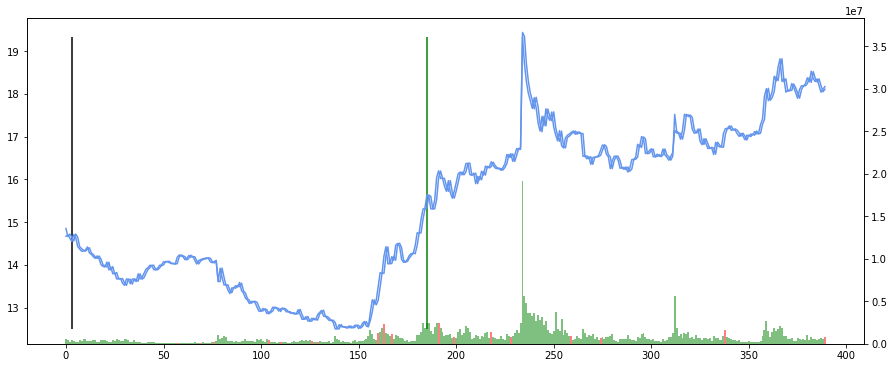

In [14]:
# Plot data
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(tdata["Open"], color="cornflowerblue")
ax1.plot(tdata["Close"], color="cornflowerblue", label="close")
if sl.size > 0:
    ax1.vlines(sl[0], min(tdata["Close"]), max(tdata["Close"]), label="Stop loss", color="black")
if pt.size > 0:
    ax1.vlines(pt[0], min(tdata["Close"]), max(tdata["Close"]), label="Profit taker", color="green")
# ax1.set(ylim=[np.min(tdata["Low"])*7/8, np.max(tdata["High"])])

ax2 = ax1.twinx()

ax2.bar(tdata.index, tdata["VolumeG"], width=1, alpha=0.5, color="green")
ax2.bar(tdata.index, tdata["VolumeR"], width=1, alpha=0.5, color="red")
ax2.set(ylim=[0, np.max(tdata["Volume"])*2])

## Before trade days (day 1-5)

Analysis of days 1-5 mainly aimed for enhancing stock screener settings

In [15]:
# stock 
# data scraper settings
interval = "1m"
# end date
ed = dt.date.today() - dt.timedelta(days=7)
# number of days 
d = 7

# scrape trade days data
bdata, binfo = sc.scrapstockdata(stockHandle=sh, d=d, i=interval, ed=ed)


Scraping https://finance.yahoo.com/
Status: started
Status: completed
